# Punto 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A demostrar:

$$ \mathcal{F}(\frac{df(x)}{dx}) = iw \mathcal{F}(f(x)) $$

Por definición $$\mathcal{F}(w)=\mathcal{F}(f(t))=\int_{-\infty}^{\infty} f(x) e^{iwx} dx$$

Si tomamos $$ f(x)= \frac{df(x)}{dx}$$

Reemplazamos:

$$\mathcal{F}(w)=\mathcal{F}(\frac{df(x)}{dx})=\int_{-\infty}^{\infty}  \frac{df(x)}{dx} e^{iwx} dx =\int_{-\infty}^{\infty}  \frac{de^{iwx}}{dx} f(x)dx =\int_{-\infty}^{\infty}  iwe^{iwx} f(x)dx= iw \int_{-\infty}^{\infty}  e^{iwx} f(x)dx$$


$$\mathcal{F}(w)= iw \int_{-\infty}^{\infty} f(x)e^{iwx} dx$$
$$\mathcal{F}(\frac{df(x)}{dx})= iw \mathcal{F}(f(t))$$

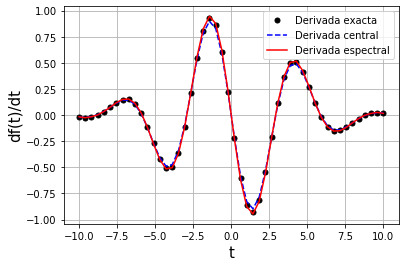

In [155]:
def Function(x):
    return np.cos(x)*np.exp(-(x**2)/25)

def ExactDerivative(x):
    return (-2*x*np.cos(x)*np.exp(-(x**2)/25)/25)-(np.sin(x)*np.exp(-(x**2)/25))


L=20
N=50
h=L/N

w0=2*np.pi/L

def CentralDerivative(f,x,h):
    
    d = 0.
    if( h!=0):
        d = (f(x+h)-f(x-h))/(2.*h)
        
    return d

def SpectralDerivative(f,x,w0):
    
    freq=w0*np.arange(-N/2,N/2)
    w= np.fft.fftshift(freq)
    fft=np.fft.fft(f(x))
    i=1j
    value=i*w*fft
    d=np.fft.ifft(value)
    return d

t=np.linspace(-10.0,10.0,50)

plt.plot(t,ExactDerivative(t),'ko',markersize=5 ,label="Derivada exacta")
plt.plot(t,CentralDerivative(Function,t,h),'b--', label="Derivada central")
plt.plot(t,SpectralDerivative(Function,t,w0).real,'r-', label="Derivada espectral")
plt.xlabel("t",fontsize=15)
plt.ylabel("df(t)/dt",fontsize=15)
plt.grid()
plt.legend()

Usamos la definición de concolución discreta:
$$ y[n] = x[n] * h[n] = \sum_{k=-\infty}^{\infty} x[k] \cdot h[n-k] $$

Tenemos que:
$$ x[n]=\delta[n]+\delta[n-1]+\delta[n-2]+\delta[n-2]$$
$$ h[n]=\delta[n]+\delta[n-1]$$

Igualamos el tamaño de las secuencias añadiendo un cero a cada extremo de h:

$$ h[n]= 0 + \delta[n]+\delta[n-1] + 0$$

Así

$$ y[n]= x[0] \cdot h[n-0] + x[1] \cdot h[n-1]+ x[2] \cdot h[n-2] + x[3] \cdot h[n-3] $$

Para n=0:
$$ y[0]= x[0] \cdot h[0] = 1$$

Para n=1:
$$ y[1]= x[0] \cdot h[1] + x[1] \cdot h[0] = 1 + 1 = 2$$

Para n=2:
$$ y[2]= x[0] \cdot h[2] + x[1] \cdot h[1] + x[2] \cdot h[0] = 0 + 1 + 2 = 3$$

Para n=3:
$$ y[3]= x[0] \cdot h[3] + x[1] \cdot h[2] + x[2] \cdot h[1] + x[3] \cdot h[0]= 0 + 0 + 1 + 0 = 1$$

Entonces:

$$ y = 1,2,3,1$$

Para hallar la convolución computacionalmente utilizamos la transformada de Fourier:

$$ \mathcal{F}(f*g) = (\mathcal{F}(f)) \cdot (\mathcal{F}(g))$$

In [171]:
def delta(t):
    if(t==0):return 1
    else: return 0

def xn(n):
    return delta(n)+ delta(n-1)+delta(n-2)+delta(n-2)

def hn(n):
    return 0 + delta(n) + delta(n-1) + 0

x=[xn(i) for i in range(4)]
#print(x)
h=[hn(i) for i in range(4)]
#print(h)

y=np.fft.ifft(np.fft.fft(x)*np.fft.fft(h)).real
print("y =",y)

y = [1. 2. 3. 2.]
